# Configuración del Entorno e Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re     # Para expresiones regulares
from collections import Counter
from scipy import stats
from sklearn.preprocessing import StandardScaler


In [2]:
# --- Configuraciones iniciales ---
# Estilo de los gráficos
sns.set_style("whitegrid")

In [3]:
# Descargar recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kgenezv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kgenezv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Carga e Inspección Inicial de los Datos

In [4]:
# Cargar el dataset (asegúrate de que la ruta sea correcta)
df = pd.read_csv("C:/Users/kgenezv/OneDrive - Universidad EAFIT/MCDA/Semestre 2/Aprendizaje de Maquina Aplicado/Proyecto/tripadvisor_hotel_reviews.csv")
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [5]:
# Análisis inicial del dataset:
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (20491, 2)


In [6]:
print(f"Columnas: {df.columns.tolist()}")

Columnas: ['Review', 'Rating']


In [7]:
print(f"Número de reseñas: {len(df)}")

Número de reseñas: 20491


In [8]:
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [9]:
# Ver las últimas filas del dataframe
print("\nÚltimas 5 filas:")
df.tail()


Últimas 5 filas:


,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [10]:
# Obtener información general y verificar valores nulos
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [11]:
# Resumen estadístico de la columna 'Rating'
print("\nEstadísticas de la columna 'Rating':")
df['Rating'].describe()


Estadísticas de la columna 'Rating':


count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

# Análisis de las Calificaciones (Ratings) 📊

*Vamos a visualizar la distribución de las calificaciones para ver si hay algún sesgo.*


=== DISTRIBUCIÓN DE RATINGS ===
Rating
1    1421
2    1793
3    2184
4    6039
5    9054
Name: count, dtype: int64


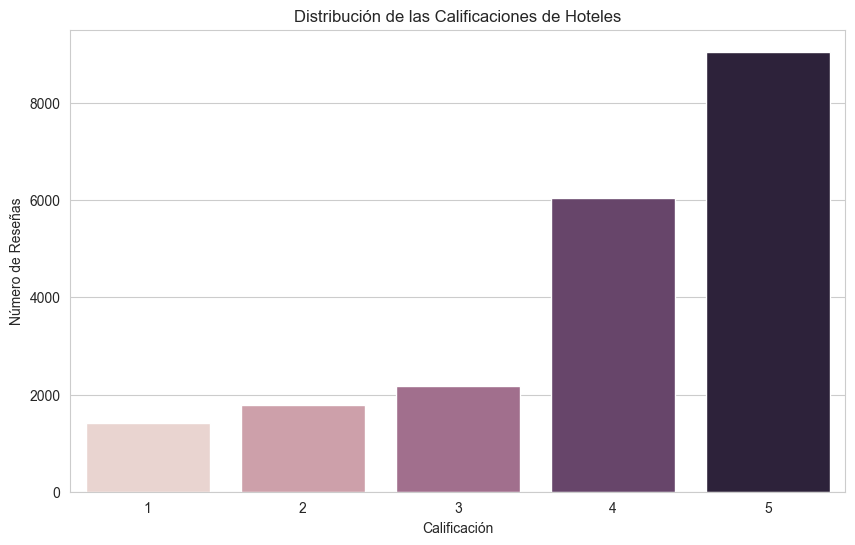

In [12]:
# Análisis de la distribución de ratings
print("\n=== DISTRIBUCIÓN DE RATINGS ===")
rating_dist = df['Rating'].value_counts().sort_index()
print(rating_dist)

plt.figure(figsize=(10, 6))
sns.countplot(x="Rating", data=df, hue="Rating", legend=False)
plt.title('Distribución de las Calificaciones de Hoteles')
plt.xlabel('Calificación')
plt.ylabel('Número de Reseñas')
plt.show()

Text(0.5, 1.0, 'Distribución Porcentual de Ratings')

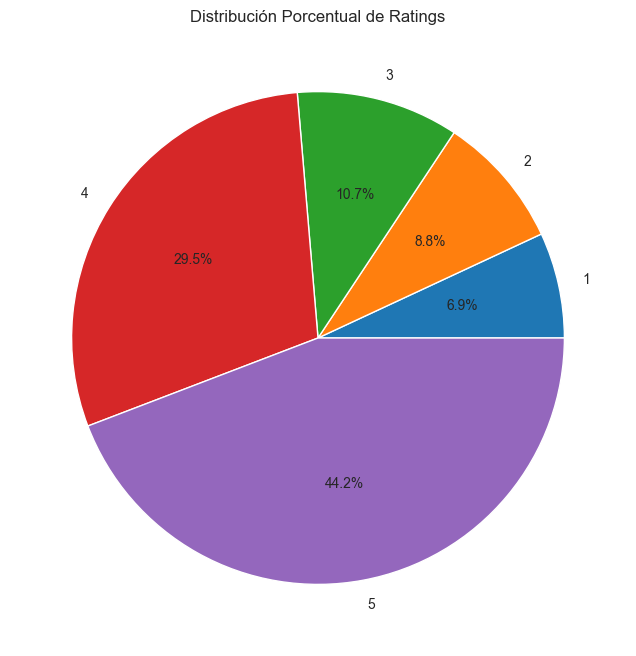

In [13]:
# Distribución porcentual
plt.figure(figsize=(12, 8))
rating_pct = df['Rating'].value_counts(normalize=True).sort_index() * 100
plt.pie(rating_pct.values, labels=rating_pct.index, autopct='%1.1f%%')
plt.title('Distribución Porcentual de Ratings')

# Análisis del Texto (Columna Reviews)

La longitud de la reseña puede ser un indicador interesante.

*Ingeniería de Características a partir del Texto*

In [14]:
# Análisis de longitud de reseñas

df['Review_Length'] = df['Review'].apply(len)
df['Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

print("\n=== ESTADÍSTICAS DE LONGITUD DE RESEÑAS ===")
print(f"Longitud promedio de reseñas: {df['Review_Length'].mean():.2f} caracteres")
print(f"Longitud mínima: {df['Review_Length'].min()} caracteres")
print(f"Longitud máxima: {df['Review_Length'].max()} caracteres")
print(f"Promedio de palabras por reseña: {df['Word_Count'].mean():.2f} palabras")


=== ESTADÍSTICAS DE LONGITUD DE RESEÑAS ===
Longitud promedio de reseñas: 724.90 caracteres
Longitud mínima: 44 caracteres
Longitud máxima: 13501 caracteres
Promedio de palabras por reseña: 104.38 palabras


Text(0.5, 1.0, 'Longitud de Reseñas por Rating')

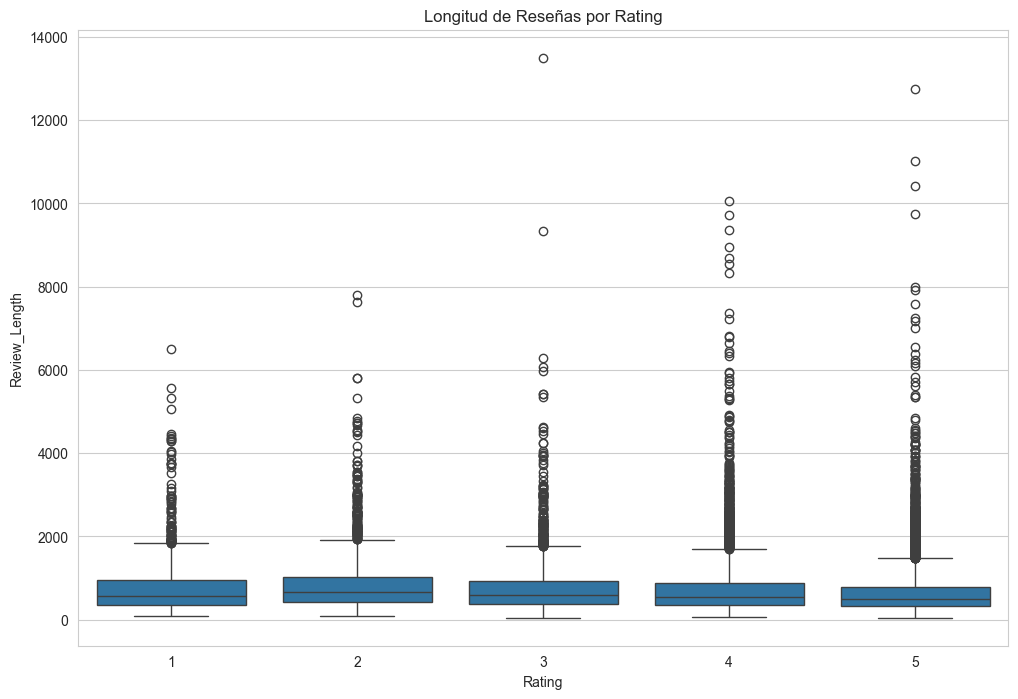

In [15]:
# Longitud de reseñas por rating

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Rating', y='Review_Length')
plt.title('Longitud de Reseñas por Rating')

Text(0.5, 1.0, 'Conteo de Palabras por Rating')

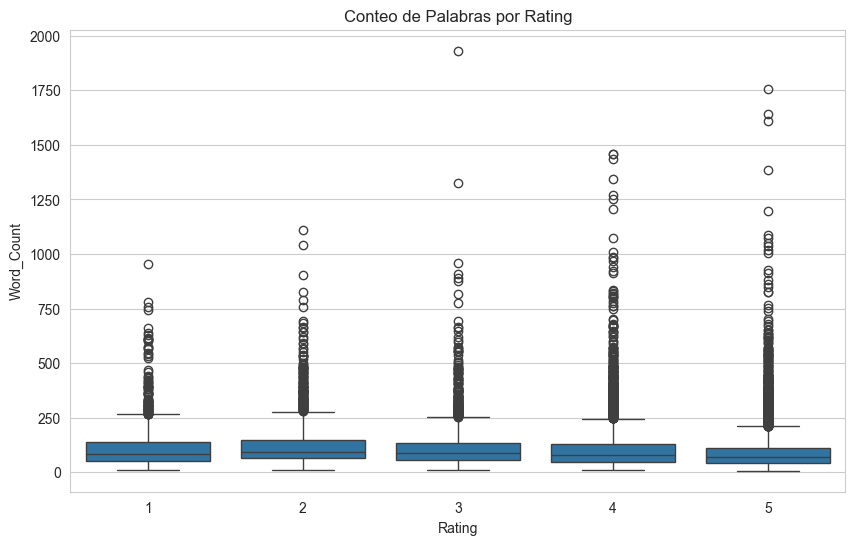

In [16]:
# Conteo de palabras por rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='Word_Count')
plt.title('Conteo de Palabras por Rating')

In [17]:
# Análisis de correlación entre rating y longitud

correlation_length = df['Rating'].corr(df['Review_Length'])
correlation_words = df['Rating'].corr(df['Word_Count'])

print(f"Correlación Rating vs Longitud de caracteres: {correlation_length:.4f}")
print(f"Correlación Rating vs Conteo de palabras: {correlation_words:.4f}")

Correlación Rating vs Longitud de caracteres: -0.0806
Correlación Rating vs Conteo de palabras: -0.0907


In [18]:
# Configuración para mejores visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

In [19]:
# Análisis de significancia estadística
corr_test_length = stats.pearsonr(df['Rating'], df['Review_Length'])
corr_test_words = stats.pearsonr(df['Rating'], df['Word_Count'])

print(f"\nTest de significancia para longitud de caracteres:")
print(f"  Coeficiente: {corr_test_length[0]:.4f}")
print(f"  p-value: {corr_test_length[1]:.4e}")
print(f"  Significativo (p < 0.05): {corr_test_length[1] < 0.05}")

print(f"\nTest de significancia para conteo de palabras:")
print(f"  Coeficiente: {corr_test_words[0]:.4f}")
print(f"  p-value: {corr_test_words[1]:.4e}")
print(f"  Significativo (p < 0.05): {corr_test_words[1] < 0.05}")


Test de significancia para longitud de caracteres:
  Coeficiente: -0.0806
  p-value: 7.3243e-31
  Significativo (p < 0.05): True

Test de significancia para conteo de palabras:
  Coeficiente: -0.0907
  p-value: 1.1356e-38
  Significativo (p < 0.05): True


In [20]:
# Análisis detallado por categoría de rating
print(f"\n=== ESTADÍSTICAS DETALLADAS POR RATING ===")

stats_by_rating = df.groupby('Rating').agg({
    'Review_Length': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'Word_Count': ['mean', 'median', 'std']
}).round(2)

stats_by_rating


=== ESTADÍSTICAS DETALLADAS POR RATING ===


Review_Length                                   Word_Count         \
               count    mean median     std min    max       mean median   
Rating                                                                     
1               1421  769.53  564.0  686.93  77   6511     112.37   82.0   
2               1793  867.00  653.0  744.42  74   7802     126.60   95.0   
3               2184  784.66  588.0  743.86  47  13501     114.71   86.0   
4               6039  745.34  539.0  729.58  61  10062     107.77   78.0   
5               9054  661.70  496.0  627.03  44  12738      93.96   69.0   

                
           std  
Rating          
1        99.83  
2       108.27  
3       109.02  
4       107.13  
5        90.98

In [21]:
# Análisis de outliers
Q1 = df['Review_Length'].quantile(0.25)
Q3 = df['Review_Length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
outliers = df[df['Review_Length'] > outlier_threshold]

print(f"\nOutliers: {len(outliers)} reseñas (> {outlier_threshold:.0f} caracteres)")


Outliers: 1449 reseñas (> 1639 caracteres)


In [22]:
# Transformación logarítmica
df['Log_Length'] = np.log1p(df['Review_Length'])

In [23]:
# Grupos de sentimiento
def get_sentiment_group(rating):
    if rating >= 4:
        return 'Positivo'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negativo'

df['Sentiment_Group'] = df['Rating'].apply(get_sentiment_group)

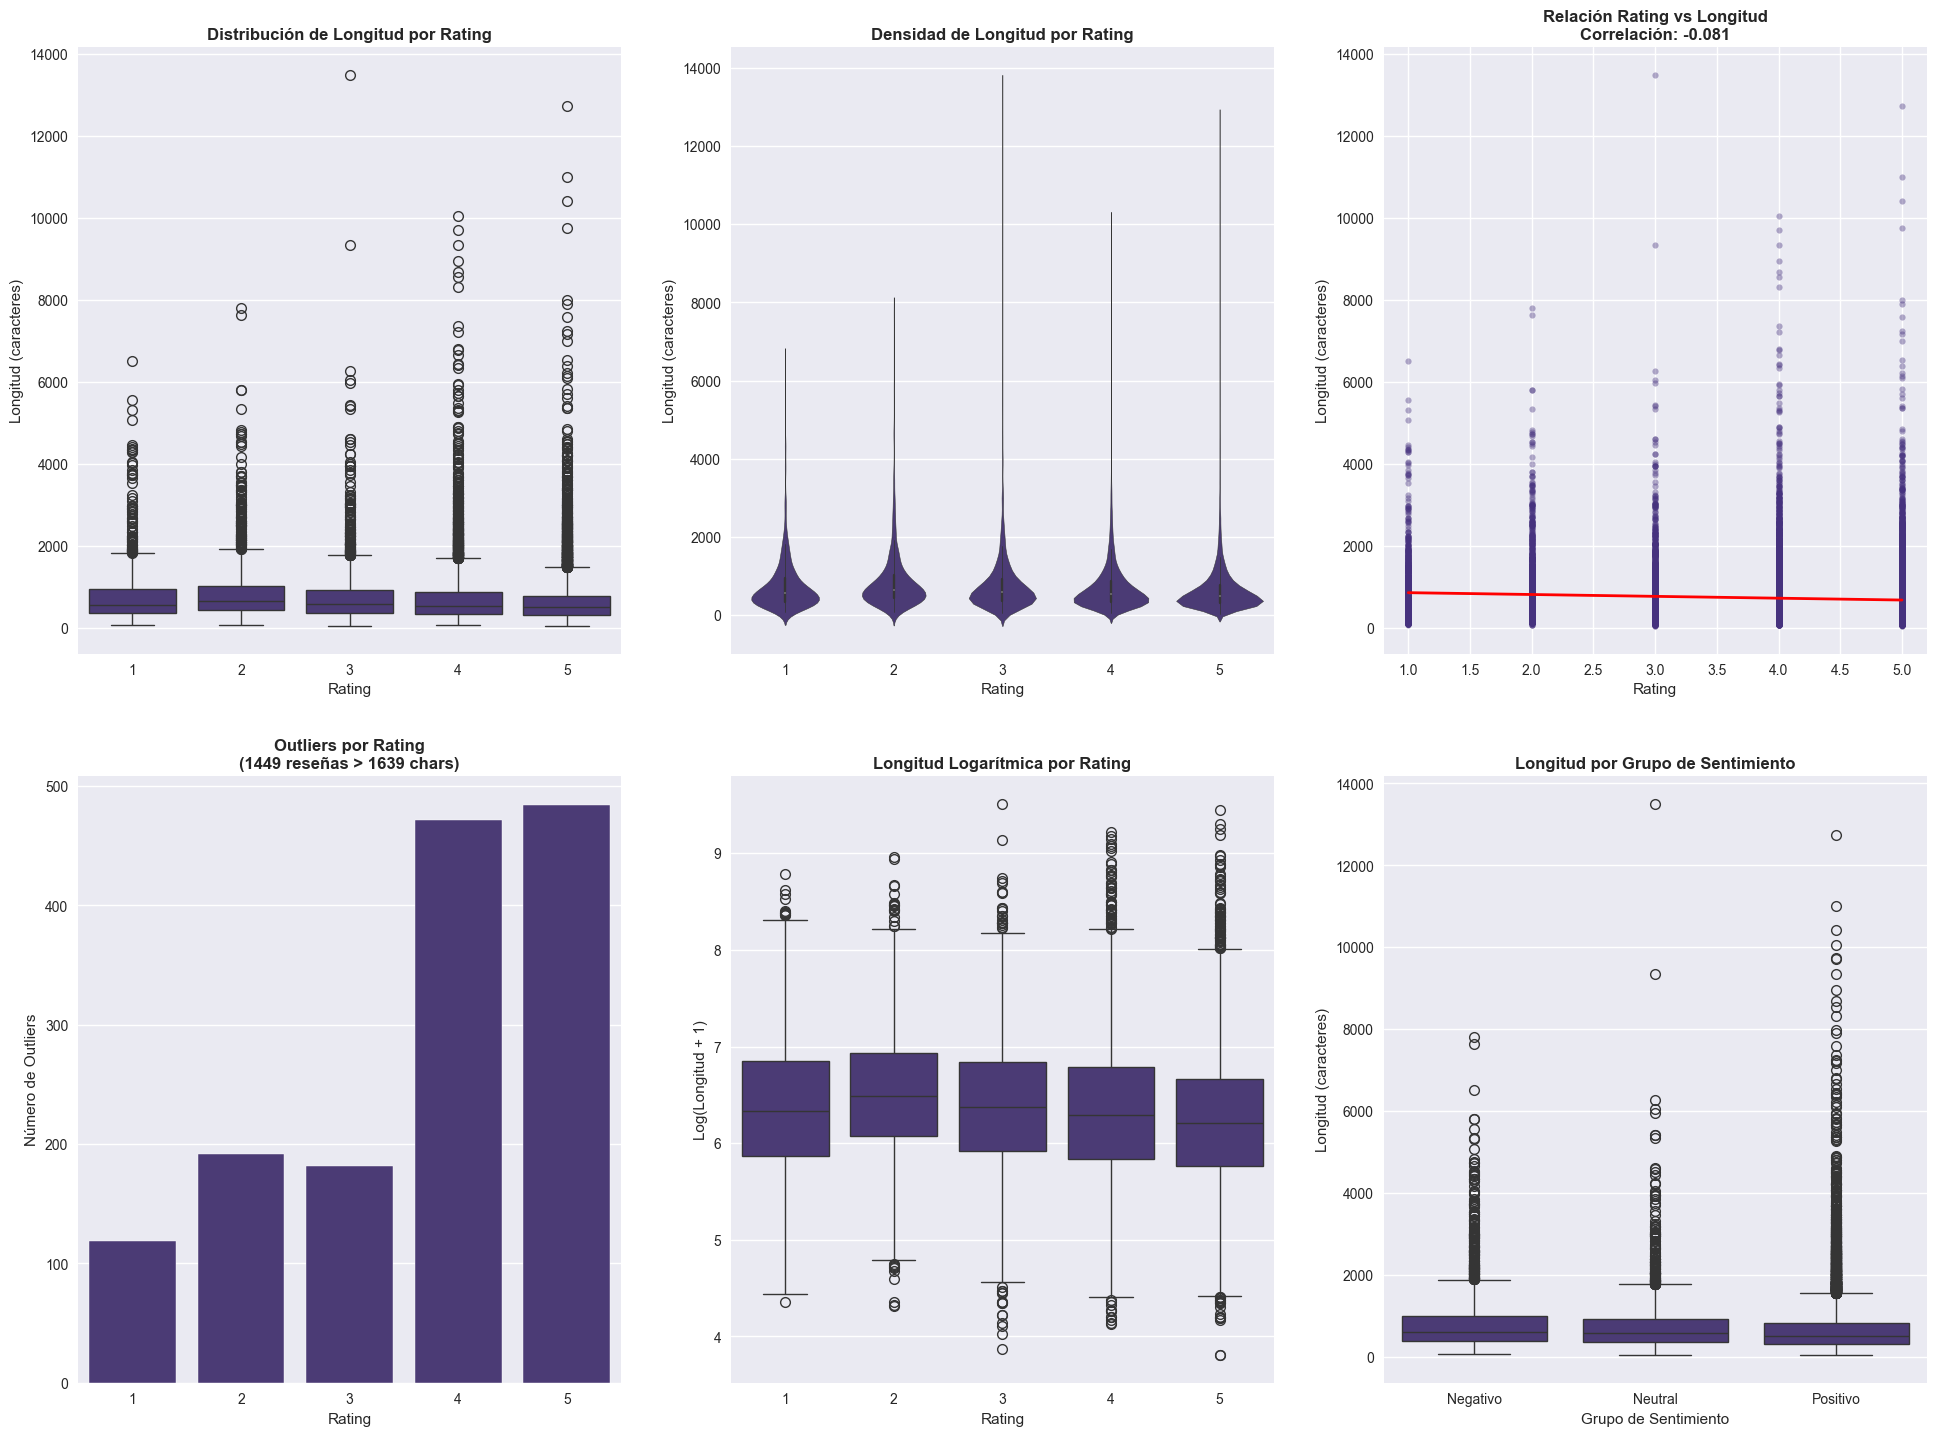

In [24]:
# FIGURA PRINCIPAL
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Gráfico 1: Boxplot de longitud por rating
sns.boxplot(data=df, x='Rating', y='Review_Length', ax=axes[0,0])
axes[0,0].set_title('Distribución de Longitud por Rating', fontsize=12, fontweight='bold')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Longitud (caracteres)')

# Gráfico 2: Violin plot
sns.violinplot(data=df, x='Rating', y='Review_Length', ax=axes[0,1])
axes[0,1].set_title('Densidad de Longitud por Rating', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Longitud (caracteres)')

# Gráfico 3: Scatter plot con tendencia
sns.regplot(data=df, x='Rating', y='Review_Length',
            scatter_kws={'alpha':0.4, 's':20},
            line_kws={'color':'red', 'linewidth':2},
            ax=axes[0,2])
axes[0,2].set_title(f'Relación Rating vs Longitud\nCorrelación: {correlation_length:.3f}',
                   fontsize=12, fontweight='bold')
axes[0,2].set_xlabel('Rating')
axes[0,2].set_ylabel('Longitud (caracteres)')

# Gráfico 4: Outliers por rating - VERIFICAR QUE HAY DATOS
if len(outliers) > 0:
    sns.countplot(data=outliers, x='Rating', ax=axes[1,0],
                  order=sorted(outliers['Rating'].unique()))
    axes[1,0].set_title(f'Outliers por Rating\n({len(outliers)} reseñas > {outlier_threshold:.0f} chars)',
                       fontsize=12, fontweight='bold')
    axes[1,0].set_xlabel('Rating')
    axes[1,0].set_ylabel('Número de Outliers')
else:
    axes[1,0].text(0.5, 0.5, 'No hay outliers', ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Outliers por Rating', fontsize=12, fontweight='bold')

# Gráfico 5: Transformación logarítmica
sns.boxplot(data=df, x='Rating', y='Log_Length', ax=axes[1,1])
axes[1,1].set_title('Longitud Logarítmica por Rating', fontsize=12, fontweight='bold')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Log(Longitud + 1)')

# Gráfico 6: Comparación por grupo de sentimiento
sns.boxplot(data=df, x='Sentiment_Group', y='Review_Length',
            order=['Negativo', 'Neutral', 'Positivo'], ax=axes[1,2])
axes[1,2].set_title('Longitud por Grupo de Sentimiento', fontsize=12, fontweight='bold')
axes[1,2].set_xlabel('Grupo de Sentimiento')
axes[1,2].set_ylabel('Longitud (caracteres)')

# Ajustar el layout
plt.tight_layout(pad=3.0)
plt.show()

In [25]:
# ANÁLISIS ESTADÍSTICO ADICIONAL
print(f"\n=== ANÁLISIS ESTADÍSTICO DETALLADO ===")

# Estadísticas por rating
print("\nEstadísticas de longitud por Rating:")
stats_by_rating = df.groupby('Rating')['Review_Length'].describe()
print(stats_by_rating[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(2))

# Estadísticas por grupo de sentimiento
print(f"\nEstadísticas por Grupo de Sentimiento:")
sentiment_stats = df.groupby('Sentiment_Group').agg({
    'Review_Length': ['count', 'mean', 'median', 'std'],
    'Rating': 'mean'
}).round(2)
print(sentiment_stats)

# Test de hipótesis ANOVA
print(f"\n=== TEST DE HIPÓTESIS ANOVA ===")
groups = [df[df['Sentiment_Group'] == group]['Review_Length']
          for group in ['Negativo', 'Neutral', 'Positivo']]

f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA - F-statistic: {f_stat:.4f}, p-value: {p_value:.4e}")

if p_value < 0.05:
    print("→ EXISTEN diferencias significativas entre los grupos de sentimiento")
    # Test post-hoc de Tukey
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(df['Review_Length'], df['Sentiment_Group'], alpha=0.05)
    print("\nTest Post-hoc (Tukey HSD):")
    print(tukey)
else:
    print("→ NO existen diferencias significativas entre los grupos")


=== ANÁLISIS ESTADÍSTICO DETALLADO ===

Estadísticas de longitud por Rating:
         count    mean     std   min     25%    50%      75%      max
Rating                                                               
1       1421.0  769.53  686.93  77.0  351.00  564.0   943.00   6511.0
2       1793.0  867.00  744.42  74.0  433.00  653.0  1028.00   7802.0
3       2184.0  784.66  743.86  47.0  370.75  588.0   931.25  13501.0
4       6039.0  745.34  729.58  61.0  340.50  539.0   885.00  10062.0
5       9054.0  661.70  627.03  44.0  318.00  496.0   784.00  12738.0

Estadísticas por Grupo de Sentimiento:
                Review_Length                        Rating
                        count    mean median     std   mean
Sentiment_Group                                            
Negativo                 3214  823.91  616.0  721.09   1.56
Neutral                  2184  784.66  588.0  743.86   3.00
Positivo                15093  695.16  514.0  671.18   4.60

=== TEST DE HIPÓTESIS ANOVA ===

In [26]:
# ANÁLISIS DE CORRELACIÓN POR SEGMENTOS
print(f"\n=== ANÁLISIS DE CORRELACIÓN POR SEGMENTOS ===")

# Dividir en cuartiles de longitud
df['Length_Quartile'] = pd.qcut(df['Review_Length'], q=4,
                                labels=['Q1 (Más cortas)', 'Q2', 'Q3', 'Q4 (Más largas)'])

print("\nRating promedio por cuartil de longitud:")
quartile_stats = df.groupby('Length_Quartile').agg({
    'Rating': ['mean', 'count'],
    'Review_Length': 'mean'
}).round(3)
print(quartile_stats)



=== ANÁLISIS DE CORRELACIÓN POR SEGMENTOS ===

Rating promedio por cuartil de longitud:
                Rating       Review_Length
                  mean count          mean
Length_Quartile                           
Q1 (Más cortas)  4.116  5129       239.431
Q2               4.012  5126       434.550
Q3               3.891  5118       676.498
Q4 (Más largas)  3.790  5118      1550.606


C:\Users\kgenezv\AppData\Local\Temp\ipykernel_14564\1432767535.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_stats = df.groupby('Length_Quartile').agg({


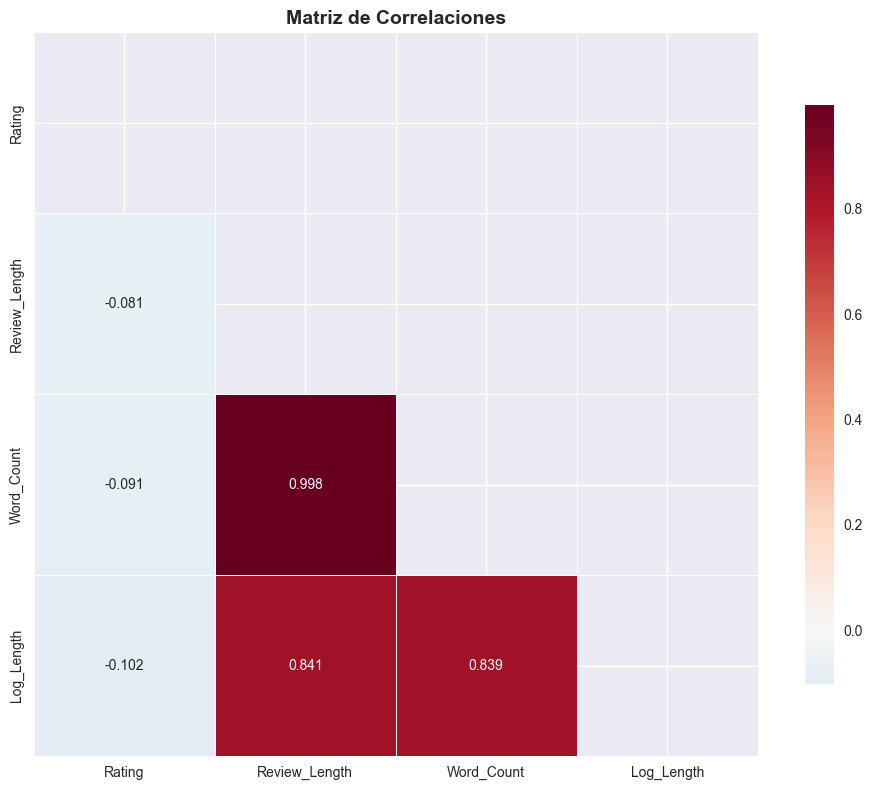

In [27]:
# Heatmap de correlaciones
#'Log_Length'

plt.figure(figsize=(10, 8))
corr_matrix = df[["Rating", "Review_Length", "Word_Count", "Log_Length"]].corr()

# Máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, fmt='.3f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlaciones', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

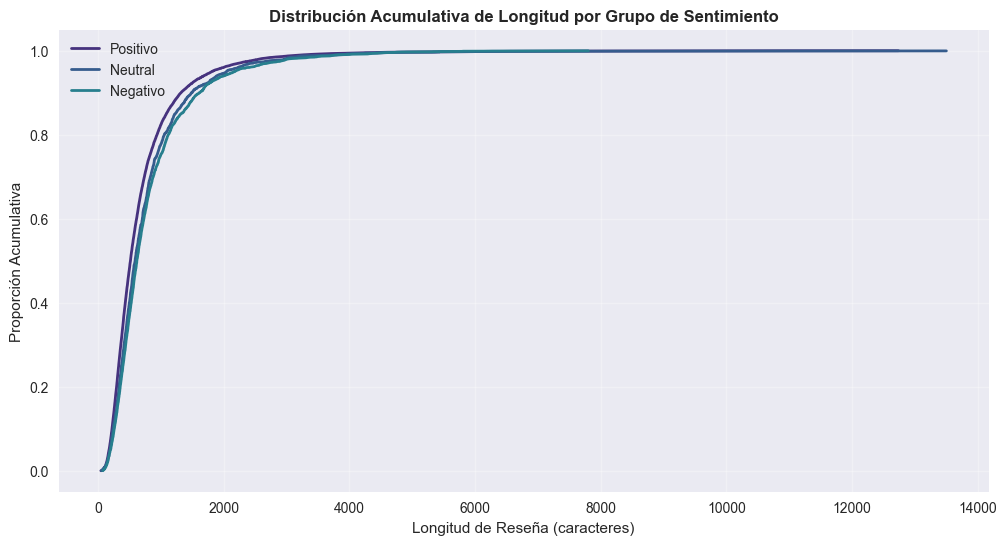

In [28]:
# Distribución acumulativa
plt.figure(figsize=(12, 6))

# Distribución acumulativa por grupo de sentimiento
for group in ['Positivo', 'Neutral', 'Negativo']:
    data = df[df['Sentiment_Group'] == group]['Review_Length']
    sorted_data = np.sort(data)
    yvals = np.arange(len(sorted_data)) / float(len(sorted_data))
    plt.plot(sorted_data, yvals, label=group, linewidth=2)

plt.xlabel('Longitud de Reseña (caracteres)')
plt.ylabel('Proporción Acumulativa')
plt.title('Distribución Acumulativa de Longitud por Grupo de Sentimiento', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

NameError: name 'correlation' is not defined

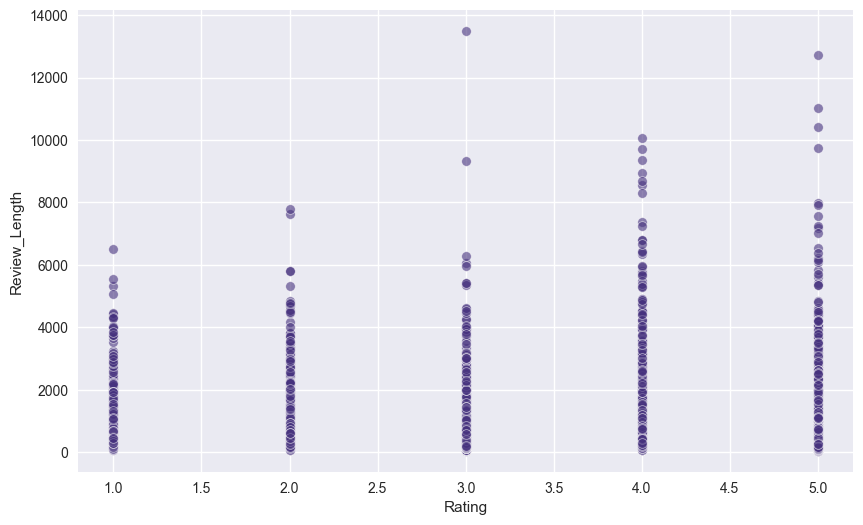

In [29]:
# Scatter plot de rating vs longitud
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Review_Length', alpha=0.6)
plt.title(f'Rating vs Longitud (Corr: {correlation:.3f})')

In [ ]:
# Palabras más comunes por categoría de rating

def get_common_words(texts, n=10):
    all_words = ' '.join(texts).lower()
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_words)
    return Counter(words).most_common(n)

In [ ]:
# Dividir en reseñas positivas (4-5), neutrales (3), y negativas (1-2)
positive_reviews = df[df['Rating'] >= 4]['Review']
neutral_reviews = df[df['Rating'] == 3]['Review']
negative_reviews = df[df['Rating'] <= 2]['Review']

print("\nPalabras más comunes en reseñas POSITIVAS (4-5 estrellas):")
print(get_common_words(positive_reviews, 15))

print("\nPalabras más comunes en reseñas NEUTRALES (3 estrellas):")
print(get_common_words(neutral_reviews, 15))

print("\nPalabras más comunes en reseñas NEGATIVAS (1-2 estrellas):")
print(get_common_words(negative_reviews, 15))


Palabras más comunes en reseñas POSITIVAS (4-5 estrellas):
[('hotel', 36733), ('room', 23000), ('great', 18455), ('not', 17890), ('staff', 12813), ('good', 12748), ('stay', 11338), ('nice', 9402), ('just', 9125), ('location', 8951), ('did', 8910), ('rooms', 8548), ('stayed', 7892), ('breakfast', 7595), ('clean', 7480)]

Palabras más comunes en reseñas NEUTRALES (3 estrellas):
[('hotel', 5164), ('not', 4767), ('room', 4596), ('good', 2516), ('did', 1944), ('nice', 1790), ('great', 1774), ('rooms', 1529), ('staff', 1517), ('just', 1472), ('location', 1453), ('stay', 1451), ('beach', 1342), ('night', 1320), ('food', 1208)]

Palabras más comunes en reseñas NEGATIVAS (1-2 estrellas):
[('not', 9052), ('hotel', 7917), ('room', 7735), ('did', 3152), ('stay', 2622), ('rooms', 2324), ('staff', 2303), ('night', 2157), ('good', 2148), ('service', 2102), ('just', 2070), ('day', 1969), ('time', 1784), ('food', 1778), ('like', 1739)]


In [ ]:
# Análisis de hoteles mencionados
print("\n=== ANÁLISIS DE HOTELES MENCIONADOS ===")
hotel_keywords = ['hotel', 'monaco', 'warwick', 'inn', 'marqueen', 'westin',
                 'sheraton', 'hilton', 'renaissance', 'crowne', 'plaza']

hotel_mentions = {}
for hotel in hotel_keywords:
    count = df['Review'].str.lower().str.contains(hotel).sum()
    if count > 0:
        hotel_mentions[hotel] = count

print("Menciones de hoteles:")
for hotel, count in sorted(hotel_mentions.items(), key=lambda x: x[1], reverse=True):
    print(f"  {hotel}: {count} menciones")



=== ANÁLISIS DE HOTELES MENCIONADOS ===
Menciones de hoteles:
  hotel: 16759 menciones
  inn: 3021 menciones
  plaza: 554 menciones
  hilton: 475 menciones
  westin: 322 menciones
  sheraton: 162 menciones
  renaissance: 71 menciones
  crowne: 49 menciones
  monaco: 28 menciones
  warwick: 16 menciones
  marqueen: 8 menciones


In [ ]:
# Resumen final
print("\n=== RESUMEN EJECUTIVO ===")
print(f"• Dataset contiene {len(df)} reseñas de hoteles")
print(f"• Distribución de ratings: {dict(rating_dist)}")
print(f"• Rating promedio: {df['Rating'].mean():.2f}")
print(f"• Reseñas positivas (4-5): {len(positive_reviews)} ({len(positive_reviews)/len(df)*100:.1f}%)")
print(f"• Reseñas neutrales (3): {len(neutral_reviews)} ({len(neutral_reviews)/len(df)*100:.1f}%)")
print(f"• Reseñas negativas (1-2): {len(negative_reviews)} ({len(negative_reviews)/len(df)*100:.1f}%)")
print(f"• Longitud promedio de reseña: {df['Review_Length'].mean():.0f} caracteres")
print(f"• Palabras promedio por reseña: {df['Word_Count'].mean():.0f} palabras")


=== RESUMEN EJECUTIVO ===
• Dataset contiene 20491 reseñas de hoteles
• Distribución de ratings: {1: 1421, 2: 1793, 3: 2184, 4: 6039, 5: 9054}
• Rating promedio: 3.95
• Reseñas positivas (4-5): 15093 (73.7%)
• Reseñas neutrales (3): 2184 (10.7%)
• Reseñas negativas (1-2): 3214 (15.7%)
• Longitud promedio de reseña: 725 caracteres
• Palabras promedio por reseña: 104 palabras


In [ ]:
# Calidad del dataset
print("\n=== CALIDAD DEL DATASET ===")
print(f"• Completitud: {100 - (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.1f}%")
print(f"• Consistencia: Todas las reseñas tienen rating entre 1-5")
print(f"• Variabilidad: Ratings distribuidos de 1 a 5 estrellas")


=== CALIDAD DEL DATASET ===
• Completitud: 100.0%
• Consistencia: Todas las reseñas tienen rating entre 1-5
• Variabilidad: Ratings distribuidos de 1 a 5 estrellas


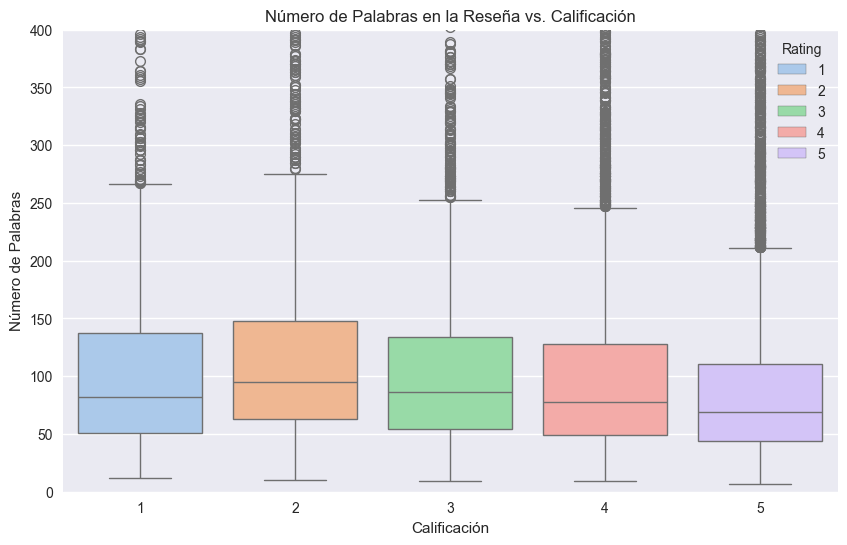

In [ ]:
# Visualizar la relación entre la longitud de la reseña y la calificación
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Word_Count', hue="Rating",data=df, palette='pastel')
plt.title('Número de Palabras en la Reseña vs. Calificación')
plt.xlabel('Calificación')
plt.ylabel('Número de Palabras')
plt.ylim(0, 400) # Limitar el eje Y para una mejor visualización
plt.show()

*Limpieza del Texto*

Crearemos una función para limpiar el texto de las reseñas, eliminando todo lo que no aporte significado (puntuación, stopwords, etc.).

In [ ]:
# Obtener stopwords en inglés
stop_words = set(stopwords.words('english'))

def limpiar_texto(texto):
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar caracteres no alfabéticos y números
    texto = re.sub(r'[^a-z\s]', '', texto)
    # Tokenizar
    palabras = word_tokenize(texto)
    # Eliminar stopwords
    palabras_limpias = [palabra for palabra in palabras if palabra not in stop_words]
    # Unir las palabras de nuevo
    return " ".join(palabras_limpias)

In [ ]:
import nltk
nltk.download('punkt_tab')

# Aplicar la función de limpieza a la columna 'Review'
df['cleaned_review'] = df['Review'].apply(limpiar_texto)

print("\nDataset con la columna de reseñas limpias:")
print(df[['Review', 'cleaned_review']].head())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kgenezv\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.



Dataset con la columna de reseñas limpias:
                                              Review  \
0  nice hotel expensive parking got good deal sta...   
1  ok nothing special charge diamond member hilto...   
2  nice rooms not 4* experience hotel monaco seat...   
3  unique, great stay, wonderful time hotel monac...   
4  great stay great stay, went seahawk game aweso...   

                                      cleaned_review  
0  nice hotel expensive parking got good deal sta...  
1  ok nothing special charge diamond member hilto...  
2  nice rooms experience hotel monaco seattle goo...  
3  unique great stay wonderful time hotel monaco ...  
4  great stay great stay went seahawk game awesom...  


In [ ]:
def generar_wordcloud(rating):
    # Filtrar el texto por calificación
    texto = " ".join(review for review in df[df['Rating'] == rating]['cleaned_review'])
    
    # Crear y generar la nube de palabras
    wordcloud = WordCloud(max_words=100, background_color="white", collocations=False).generate(texto)
    
    # Mostrar la imagen
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Nube de Palabras para Reseñas con Calificación {rating}', fontsize=16)
    plt.show()


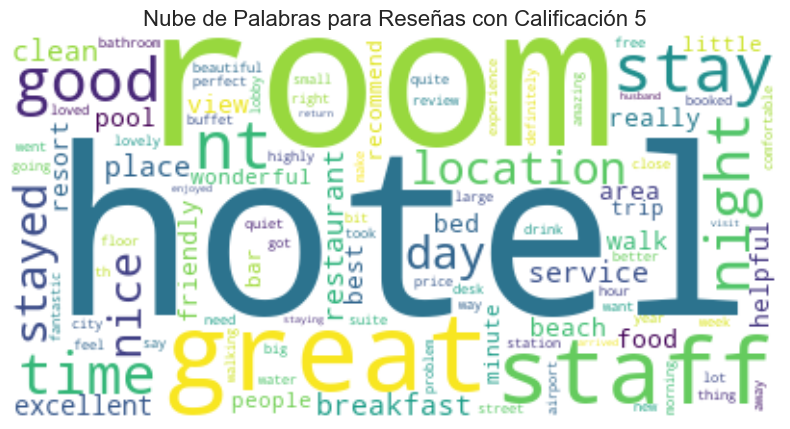

In [ ]:
# Generar nube de palabras para las mejores reseñas (5 estrellas)
generar_wordcloud(5)

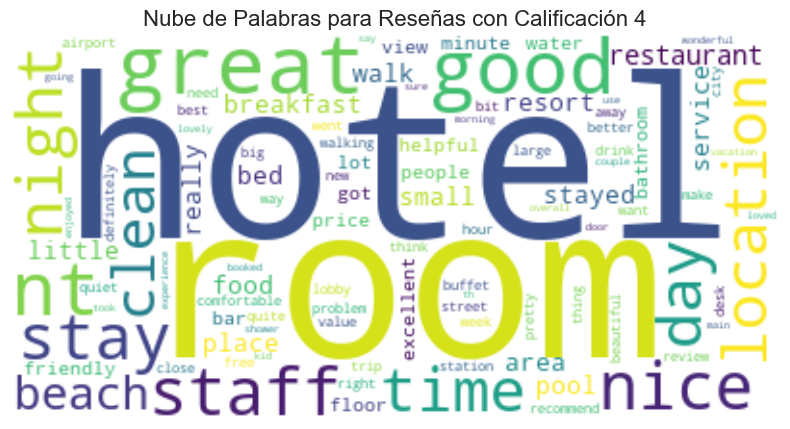

In [ ]:
# Generar nube de palabras para las mejores reseñas (4 estrellas)
generar_wordcloud(4)

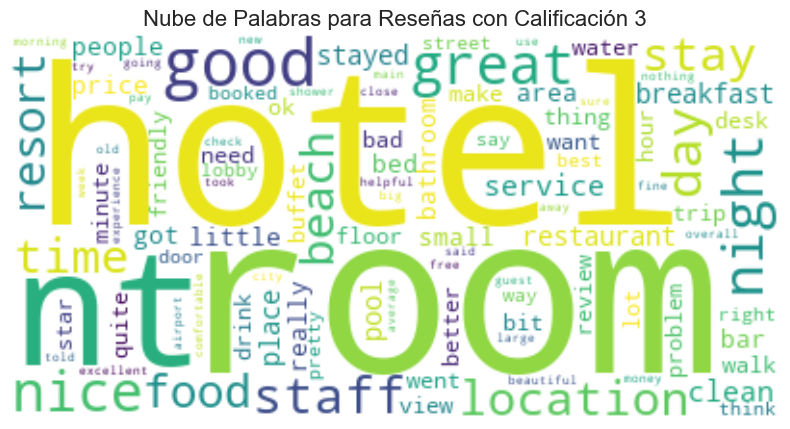

In [ ]:
# Generar nube de palabras para las mejores reseñas (3 estrellas)
generar_wordcloud(3)

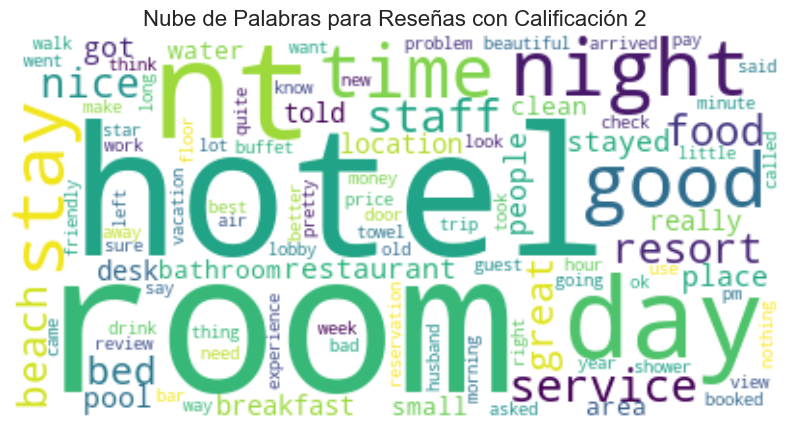

In [ ]:
# Generar nube de palabras para las mejores reseñas (2 estrellas)
generar_wordcloud(2)

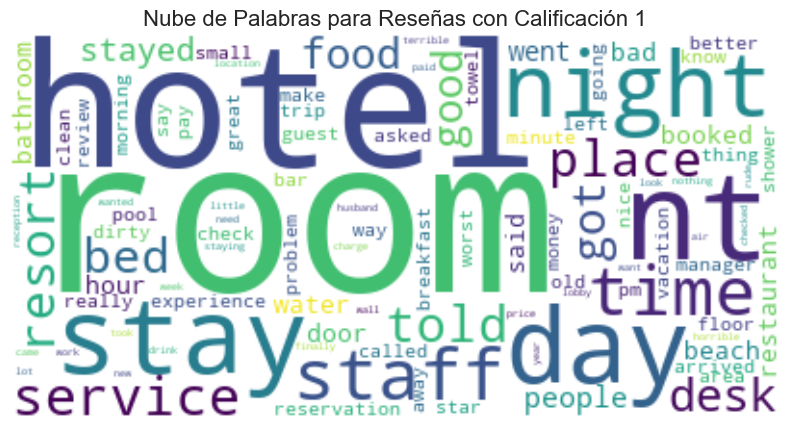

In [ ]:
# Generar nube de palabras para las peores reseñas (1 estrella)
generar_wordcloud(1)

In [ ]:
from nltk import FreqDist, ngrams
from collections import Counter

def obtener_ngramas_comunes(texto, n=1, top_n=15):
    # Unir todo el texto
    texto_completo = " ".join(review for review in texto)
    palabras = texto_completo.split()
    
    if n == 1:
        # Frecuencia de palabras individuales (unigramas)
        fdist = FreqDist(palabras)
    else:
        # Frecuencia de n-gramas
        n_gramas = ngrams(palabras, n)
        fdist = FreqDist(n_gramas)
        
    return fdist.most_common(top_n)

In [ ]:
# Obtener los bigramas más comunes en reseñas de 1 estrella
texto_1_estrella = df[df['Rating'] == 1]['cleaned_review']
bigramas_1_estrella = obtener_ngramas_comunes(texto_1_estrella, n=2, top_n=30)
print("\nBigramas más comunes en reseñas de 1 estrella:")
bigramas_1_estrella


Bigramas más comunes en reseñas de 1 estrella:


[(('punta', 'cana'), 150),
 (('credit', 'card'), 110),
 (('star', 'hotel'), 107),
 (('customer', 'service'), 104),
 (('stay', 'hotel'), 101),
 (('hotel', 'staff'), 86),
 (('worst', 'hotel'), 82),
 (('room', 'service'), 82),
 (('stay', 'away'), 75),
 (('hotel', 'room'), 74),
 (('ca', 'nt'), 73),
 (('stayed', 'hotel'), 70),
 (('air', 'conditioning'), 70),
 (('got', 'room'), 69),
 (('nt', 'stay'), 68),
 (('travel', 'agent'), 66),
 (('nt', 'work'), 65),
 (('san', 'juan'), 61),
 (('booked', 'hotel'), 59),
 (('hotel', 'stayed'), 59),
 (('hot', 'water'), 58),
 (('nt', 'know'), 58),
 (('desk', 'staff'), 56),
 (('wo', 'nt'), 55),
 (('new', 'orleans'), 54),
 (('room', 'nt'), 53),
 (('recommend', 'hotel'), 51),
 (('good', 'thing'), 49),
 (('looked', 'like'), 49),
 (('room', 'small'), 47)]

In [ ]:
# Obtener los bigramas más comunes en reseñas de 2 estrellas
texto_2_estrella = df[df['Rating'] == 2]['cleaned_review']
bigramas_2_estrellas = obtener_ngramas_comunes(texto_2_estrella, n=2, top_n=30)
print("\nBigramas más comunes en reseñas de 2 estrellas:")
bigramas_2_estrellas


Bigramas más comunes en reseñas de 2 estrellas:


[(('punta', 'cana'), 200),
 (('star', 'hotel'), 145),
 (('room', 'service'), 142),
 (('ca', 'nt'), 131),
 (('staff', 'friendly'), 122),
 (('air', 'conditioning'), 120),
 (('stay', 'hotel'), 98),
 (('wo', 'nt'), 97),
 (('san', 'juan'), 97),
 (('great', 'location'), 96),
 (('nt', 'know'), 91),
 (('stayed', 'hotel'), 90),
 (('make', 'sure'), 87),
 (('hotel', 'room'), 80),
 (('hotel', 'staff'), 79),
 (('good', 'location'), 78),
 (('room', 'small'), 78),
 (('th', 'floor'), 77),
 (('hotel', 'good'), 73),
 (('customer', 'service'), 72),
 (('room', 'clean'), 72),
 (('stayed', 'nights'), 69),
 (('nt', 'stay'), 66),
 (('room', 'nt'), 65),
 (('nt', 'work'), 64),
 (('recommend', 'hotel'), 63),
 (('nt', 'want'), 62),
 (('booked', 'hotel'), 61),
 (('desk', 'staff'), 61),
 (('got', 'room'), 61)]

In [ ]:
# Obtener los bigramas más comunes en reseñas de 3 estrellas
texto_3_estrella = df[df['Rating'] == 3]['cleaned_review']
bigramas_3_estrellas = obtener_ngramas_comunes(texto_3_estrella, n=2, top_n=30)
print("\nBigramas más comunes en reseñas de 3 estrellas:")
bigramas_3_estrellas


Bigramas más comunes en reseñas de 3 estrellas:


[(('great', 'location'), 250),
 (('staff', 'friendly'), 235),
 (('punta', 'cana'), 201),
 (('ca', 'nt'), 193),
 (('good', 'location'), 167),
 (('room', 'clean'), 135),
 (('walking', 'distance'), 132),
 (('hotel', 'great'), 130),
 (('room', 'service'), 129),
 (('san', 'juan'), 125),
 (('stayed', 'hotel'), 124),
 (('star', 'hotel'), 122),
 (('th', 'floor'), 120),
 (('good', 'value'), 120),
 (('stayed', 'nights'), 116),
 (('make', 'sure'), 112),
 (('hotel', 'good'), 111),
 (('location', 'hotel'), 109),
 (('room', 'small'), 104),
 (('minute', 'walk'), 103),
 (('location', 'great'), 101),
 (('nice', 'hotel'), 97),
 (('room', 'nice'), 96),
 (('nothing', 'special'), 96),
 (('air', 'conditioning'), 91),
 (('friendly', 'helpful'), 89),
 (('hotel', 'room'), 89),
 (('breakfast', 'buffet'), 89),
 (('hotel', 'staff'), 88),
 (('pretty', 'good'), 87)]

In [ ]:
# Obtener los bigramas más comunes en reseñas de 4 estrellas
texto_4_estrella = df[df['Rating'] == 4]['cleaned_review']
bigramas_4_estrellas = obtener_ngramas_comunes(texto_4_estrella, n=2, top_n=30)
print("\nBigramas más comunes en reseñas de 4 estrellas")
bigramas_4_estrellas


Bigramas más comunes en reseñas de 4 estrellas


[(('great', 'location'), 814),
 (('staff', 'friendly'), 724),
 (('hotel', 'great'), 558),
 (('punta', 'cana'), 551),
 (('walking', 'distance'), 513),
 (('ca', 'nt'), 501),
 (('friendly', 'helpful'), 465),
 (('great', 'hotel'), 444),
 (('th', 'floor'), 415),
 (('good', 'value'), 404),
 (('room', 'clean'), 397),
 (('nice', 'hotel'), 396),
 (('minute', 'walk'), 391),
 (('great', 'time'), 387),
 (('staff', 'helpful'), 380),
 (('recommend', 'hotel'), 360),
 (('room', 'service'), 356),
 (('stayed', 'hotel'), 356),
 (('hotel', 'good'), 355),
 (('hotel', 'staff'), 343),
 (('stayed', 'nights'), 341),
 (('good', 'location'), 335),
 (('place', 'stay'), 323),
 (('stay', 'hotel'), 297),
 (('san', 'juan'), 294),
 (('great', 'place'), 290),
 (('food', 'good'), 277),
 (('good', 'hotel'), 273),
 (('definitely', 'stay'), 267),
 (('value', 'money'), 267)]

In [ ]:
# Obtener los bigramas más comunes en reseñas de 5 estrellas
texto_5_estrellas = df[df['Rating'] == 5]['cleaned_review']
bigramas_5_estrellas = obtener_ngramas_comunes(texto_5_estrellas, n=2, top_n=30)
print("\nBigramas más comunes en reseñas de 5 estrellas:")
bigramas_5_estrellas


Bigramas más comunes en reseñas de 5 estrellas:


[(('staff', 'friendly'), 958),
 (('great', 'location'), 956),
 (('great', 'hotel'), 925),
 (('ca', 'nt'), 911),
 (('hotel', 'great'), 860),
 (('recommend', 'hotel'), 817),
 (('friendly', 'helpful'), 740),
 (('highly', 'recommend'), 728),
 (('walking', 'distance'), 705),
 (('hotel', 'staff'), 619),
 (('punta', 'cana'), 584),
 (('stayed', 'hotel'), 550),
 (('th', 'floor'), 541),
 (('place', 'stay'), 529),
 (('stay', 'hotel'), 498),
 (('minute', 'walk'), 496),
 (('definitely', 'stay'), 494),
 (('staff', 'helpful'), 493),
 (('hotel', 'stayed'), 493),
 (('new', 'york'), 477),
 (('room', 'service'), 473),
 (('great', 'place'), 452),
 (('stayed', 'nights'), 438),
 (('location', 'great'), 400),
 (('room', 'clean'), 387),
 (('great', 'time'), 356),
 (('make', 'sure'), 355),
 (('hotel', 'excellent'), 323),
 (('san', 'francisco'), 319),
 (('rooms', 'clean'), 318)]

# Modelo baseline (Logistic Regression o Naive Bayes)

In [33]:
import re

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-zA-Z\s]", "", texto)  # solo letras y espacios
    return texto

df["clean_review"] = df["Review"].apply(limpiar_texto)

In [34]:
from sklearn.model_selection import train_test_split

X = df["clean_review"]
y = df["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# Modelo 1: Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.5506221029519395
              precision    recall  f1-score   support

           1       0.79      0.39      0.53       284
           2       0.39      0.20      0.26       359
           3       0.24      0.01      0.02       437
           4       0.40      0.40      0.40      1208
           5       0.62      0.88      0.73      1811

    accuracy                           0.55      4099
   macro avg       0.49      0.38      0.39      4099
weighted avg       0.51      0.55      0.50      4099



In [38]:
# Modelo 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.607709197365211
              precision    recall  f1-score   support

           1       0.71      0.65      0.68       284
           2       0.45      0.36      0.40       359
           3       0.44      0.22      0.29       437
           4       0.50      0.50      0.50      1208
           5       0.69      0.82      0.75      1811

    accuracy                           0.61      4099
   macro avg       0.56      0.51      0.52      4099
weighted avg       0.59      0.61      0.59      4099

